In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
eda_pj = pd.read_csv("./data/eda-proj-fc-purchase.csv")
eda_pj

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022. 12. 31. 오후 10:12:33,-,189000,TRANSFER,159000,-,159000,-
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022. 12. 30. 오후 6:12:57,-,501000,TRANSFER,501000,-,501000,-
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022. 12. 31. 오후 11:12:15,-,549000,CARD,549000,-,549000,-
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022. 12. 31. 오후 11:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022. 12. 31. 오후 11:12:10,-,239000,CARD,239000,-,239000,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,1551424,PAYMENT,39658,204491,FASTCAMPUS,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022. 1. 1. 오전 12:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,-
159324,1551410,PAYMENT,95136,206811,FASTCAMPUS,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022. 1. 1. 오전 12:01:12,-,385000,CARD,385000,-,385000,-
159325,1551361,PAYMENT,12764,202927,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022. 1. 1. 오전 12:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,-
159326,1545070,PAYMENT,19606,208104,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022. 1. 2. 오전 11:01:24,-,289000,VBANK,289000,-,289000,-


In [3]:
eda_pj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   거래id       159328 non-null  int64 
 1   유형         159328 non-null  object
 2   고객id       159328 non-null  int64 
 3   코스ID       159328 non-null  int64 
 4   사이트        159328 non-null  object
 5   포맷         159328 non-null  object
 6   카테고리       159328 non-null  object
 7   코스(상품) 이름  159328 non-null  object
 8   거래일자       159328 non-null  object
 9   쿠폰이름       159328 non-null  object
 10  판매가격       159328 non-null  object
 11  결제수단       159328 non-null  object
 12  실거래금액      159328 non-null  int64 
 13  쿠폰할인액      159328 non-null  object
 14  거래금액       159328 non-null  object
 15  환불금액       159328 non-null  object
dtypes: int64(4), object(12)
memory usage: 19.4+ MB


In [4]:
eda_pj.describe()

,거래id,고객id,코스ID,실거래금액
count,1.593280e+05,159328.000000,159328.000000,1.593280e+05
mean,1.968703e+06,50061.549903,207679.355123,1.418337e+05
std,2.516892e+05,28850.738273,3541.408820,1.397796e+05
min,1.486194e+06,0.000000,2204.000000,-1.054400e+06
25%,1.743640e+06,25081.500000,204373.000000,7.800000e+04
50%,1.971748e+06,50082.500000,207161.000000,1.620000e+05
75%,2.188854e+06,75071.000000,210796.000000,2.176000e+05
max,2.417084e+06,99999.000000,214834.000000,1.339200e+06


In [5]:
# 총 매출금액
total = 0
for i in range(len(eda_pj['실거래금액'])):
    if (eda_pj['실거래금액'][i]) > 0:
        total += eda_pj['실거래금액'][i]

print(total)

# 총 환불 금액
refund = 0
for j in range(len(eda_pj['환불금액'])):
    if (eda_pj['환불금액'][j]) != "-":
        refund += int(eda_pj['환불금액'][j])

print(refund)

24853638278
-2255566195


([<matplotlib.patches.Wedge at 0x16b995160>,
 [Text(-1.1109365169659142, 0.29718690292750666, '실거래금액'),
  Text(1.1109365169659142, -0.2971869029275068, '환불금액')],
 [Text(-0.6279206400242122, 0.16797520600250376, '91.7'),
  Text(0.6279206400242122, -0.16797520600250382, '8.3')])

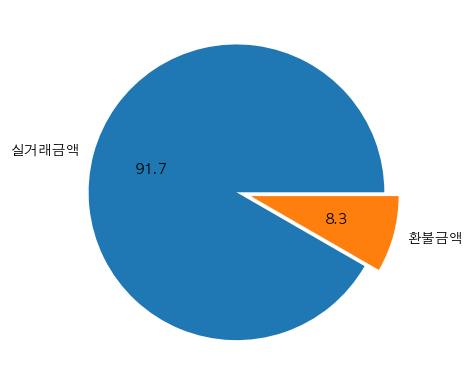

In [14]:
# 실거래금액과 환불금액의 비율 표

import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic' 

value = [total, abs(refund)]
label = ['실거래금액','환불금액']
explode = [0.05] * 2

plt.pie(value, labels=label, autopct="%.1f", explode=explode)

In [44]:
# 실거래금액 월별 분석

eda_pj['거래일자'].head()
dates = eda_pj['거래일자'].str.replace("오전", "")
dates = dates.str.replace("오후", "")
dates = dates.str.replace(" ", "")
dates = dates.str.replace(".", " ")

month = []
for i in range(len(dates)):
    redate = datetime.datetime.strptime(dates[i], '%Y %m %d %H:%M:%S')
    redate = redate.strftime('%m')
    month.append(redate)
month

price_m = eda_pj.groupby()
price_m



KeyError: '실거래금액'